# Energy Efficiency Dataset
###**Source:** https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset
###**Objective:** Analyze energy efficiency metrics in buildings.
###**Overview**
This dataset contains information on energy efficiency for buildings based on various architectural and structural features. It helps analyze the relationship between building characteristics and energy consumption.

###**Colomns/Features:**
1. X1: Relative Compactness
2. X2: Surface Area
3. X3: Wall Area
4. X4: Roof Area
5. X5: Overall Height
6. X6: Orientation
7. X7: Glazing Area
8. X8: Glazing Area Distribution
9. Y1: Heating Load (Energy required for heating)- TARGET VARIABLE
10.Y2: Cooling Load (Energy required for cooling)- TARGET VARIABLE









In [1]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
data = pd.read_csv("/content/ENB2012_data.csv")

In [3]:
#printing the dataset
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


This data set has two target variables namely Heating load(Y1) and Cooling load(Y2)

In [8]:
# Renaming the colomns columns
data = data.rename(columns={
    'X1': 'X1(Relative Compactness)',
    'X2': 'X2(Surface Area)',
    'X3': 'X3(Wall Area)',
    'X4': 'X4(Roof Area)',
    'X5': 'X5(Overall Height)',
    'X6': 'X6(Orientation)',
    'X7': 'X7(Glazing Area)',
    'X8': 'X8(Glazing Area Distribution)',
    'Y1': 'Y1(Heating Load)',
    'Y2': 'Y2(Cooling Load)'
})

Renaming the colomns X1,X2... with the categorial terms of the respective.

In [10]:
#printing the dataset
data.head()

,X1(Relative Compactness),X2(Surface Area),X3(Wall Area),X4(Roof Area),X5(Overall Height),X6(Orientation),X7(Glazing Area),X8(Glazing Area Distribution),Y1(Heating Load),Y2(Cooling Load)
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [11]:
##finding the datatypes,colums and rows /information of the data provided or summaryzing the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   X1(Relative Compactness)       768 non-null    float64
 1   X2(Surface Area)               768 non-null    float64
 2   X3(Wall Area)                  768 non-null    float64
 3   X4(Roof Area)                  768 non-null    float64
 4   X5(Overall Height)             768 non-null    float64
 5   X6(Orientation)                768 non-null    int64  
 6   X7(Glazing Area)               768 non-null    float64
 7   X8(Glazing Area Distribution)  768 non-null    int64  
 8   Y1(Heating Load)               768 non-null    float64
 9   Y2(Cooling Load)               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


From the info we can see
1. The data has 768 rows and 10 columns
2. There are no null values and has no colomn with categorial data




In [12]:
#Print the duplicated rows
data[data.duplicated()]

,X1(Relative Compactness),X2(Surface Area),X3(Wall Area),X4(Roof Area),X5(Overall Height),X6(Orientation),X7(Glazing Area),X8(Glazing Area Distribution),Y1(Heating Load),Y2(Cooling Load)


There are no duplicate rows so we can proceed with further analysis

In [13]:
#Finding the no.of null values in data
data.isnull().sum()

,0
X1(Relative Compactness),0
X2(Surface Area),0
X3(Wall Area),0
X4(Roof Area),0
X5(Overall Height),0
X6(Orientation),0
X7(Glazing Area),0
X8(Glazing Area Distribution),0
Y1(Heating Load),0
Y2(Cooling Load),0


In [14]:
#Describing the data /finding the mean,Standard deviation ,count, median for columns
data.describe()

,X1(Relative Compactness),X2(Surface Area),X3(Wall Area),X4(Roof Area),X5(Overall Height),X6(Orientation),X7(Glazing Area),X8(Glazing Area Distribution),Y1(Heating Load),Y2(Cooling Load)
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


1. From describing data we can numerical coloumns has some diff between 75%(upper quartile region) and max (outer extreme) so there might be outliers present
2. So plotting histogram and boxplot for numerical colomns for futher analysis


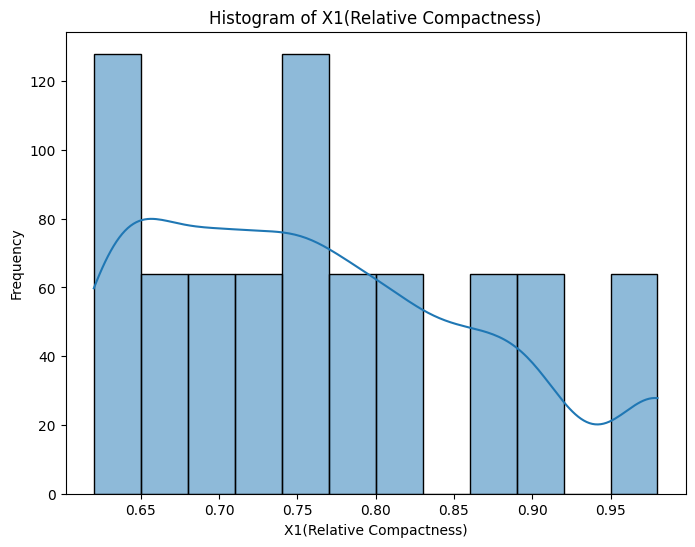

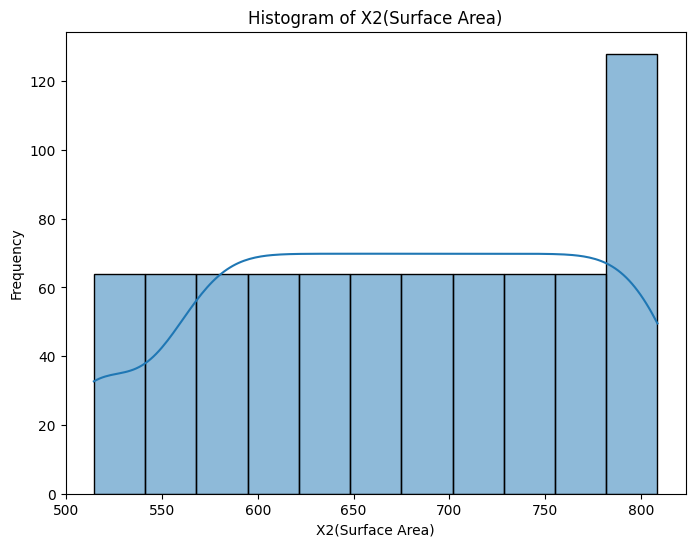

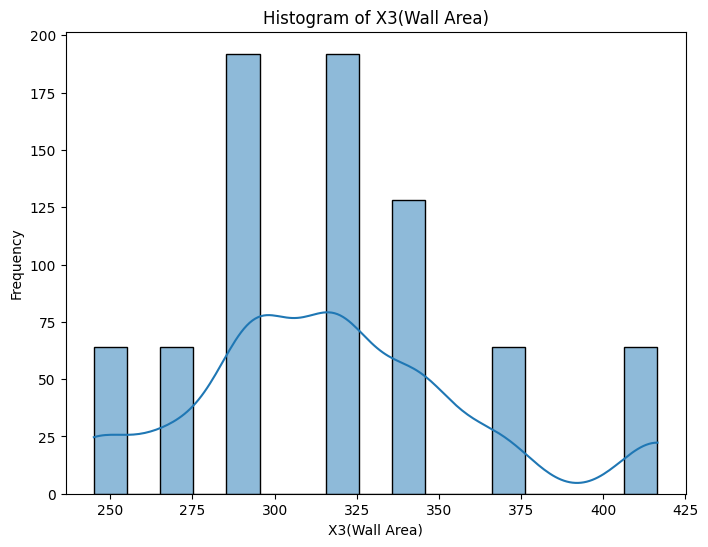

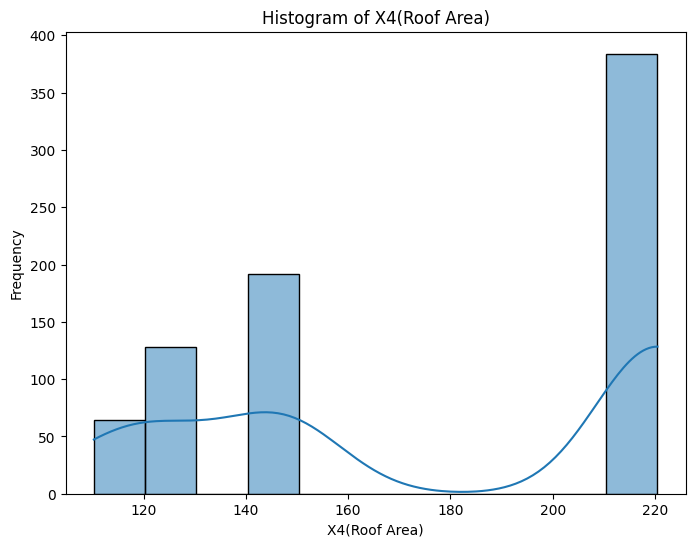

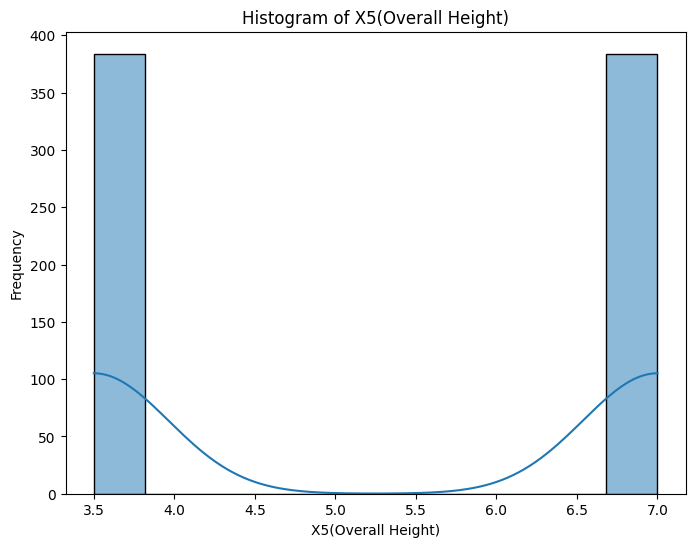

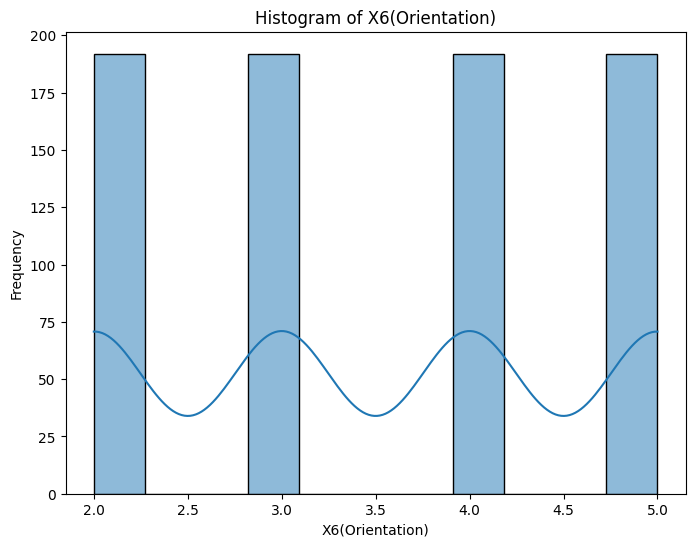

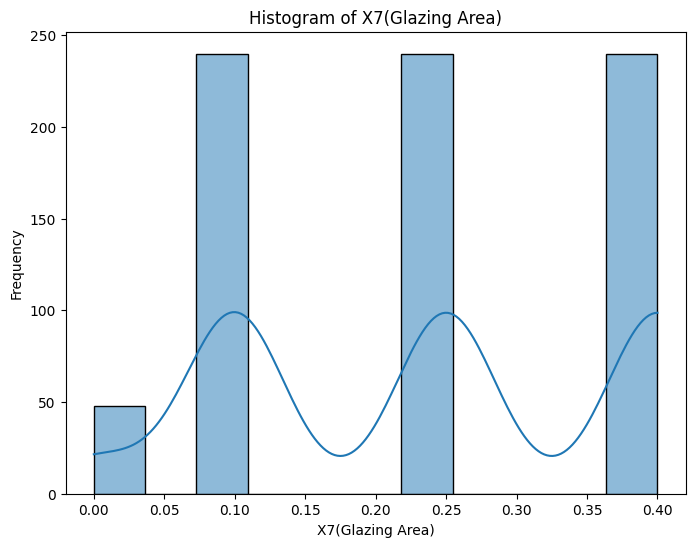

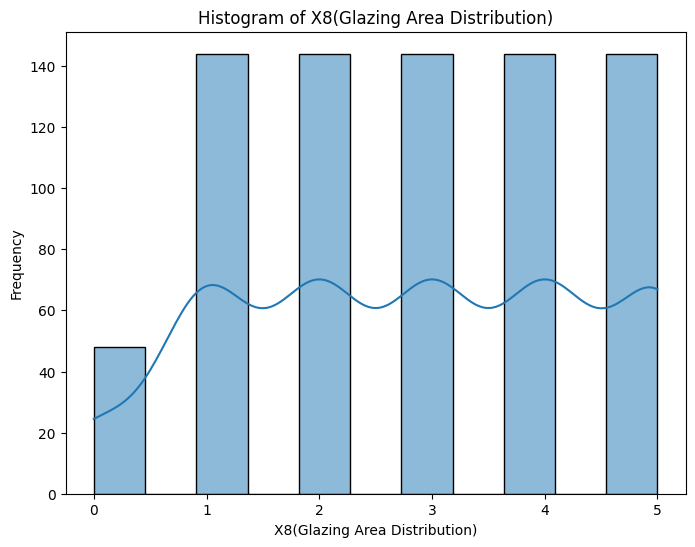

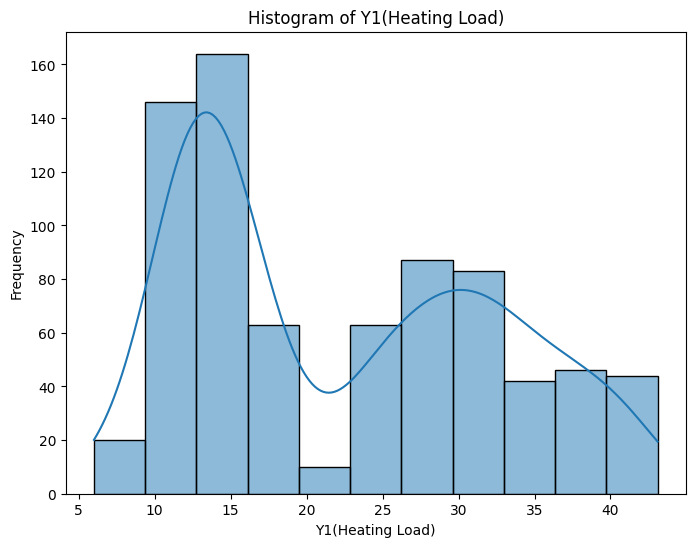

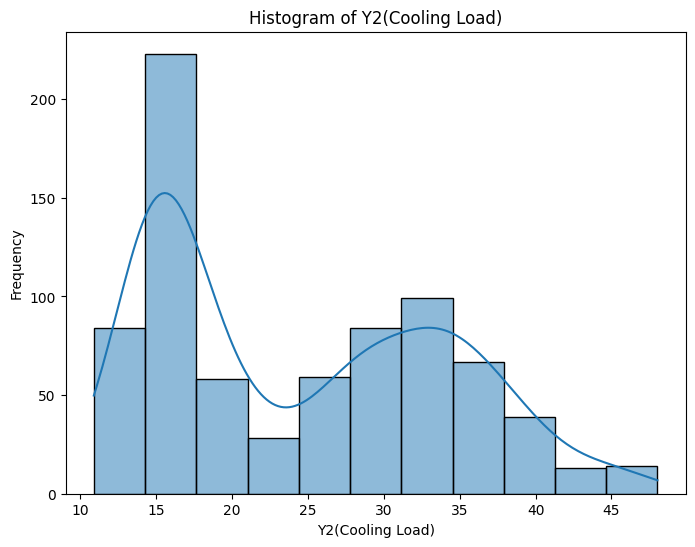

In [15]:
#Histogram for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)  # Added KDE for better visualization
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From histogram
1. Relative Compactness (X1) has Highest peak at 0.75 with a secondary peak at 0.62, indicating that most buildings have compactness values around these points.Ranges from 0.62 to 0.98.The distribution is left-skewed, suggesting that most buildings have higher compactness, and a few with lower values could be potential outliers.
2. Surface Area (X2) Peaks at 550 and 750, indicating two distinct building groups—possibly small and large structures.
Ranges from 500 to 800.buildings tend to cluster around two different size categories rather than being evenly distributed.
3. Wall Area (X3) highest frequency around 300-350, indicating that most buildings fall within this range.Ranges from 240 to 420.
4. Roof Area (X4) peak at 110, suggesting that most buildings have smaller roof areas.Ranges from 100 to 300.Right-skewed, meaning most buildings have smaller roof areas, with a few having significantly larger ones.
5. Overall Height (X5) has only two distinct values 3.5 and 7.Suggests that the dataset includes two major building types: low-rise and high-rise.
6. Orientation (X6) peaks at 2, 3, 4, and 5, suggesting equal distribution among four different orientations.This feature does not exhibit skewness.
7. Glazing Area (X7) highest peak at 0, indicating that many buildings have no or minimal glazing.Ranges from 0 to 0.4, with values mostly concentrated below 0.2.Right-skewed, meaning fewer buildings have high glazing areas.
8. Glazing Area Distribution (X8) distinct peaks at 0, 2, and 5.The dataset likely represents specific categories rather than a continuous distribution.
9. Heating Load (Y1 - Target Variable) highest peak around 15-20, meaning most buildings require moderate heating loads.Ranges from 6 to 43. Right-skewed, indicating that while most buildings have moderate heating requirements, a few require significantly more heating.
10. Cooling Load (Y2 - Target Variable) peak around 18-22, with most buildings falling in this range.Ranges from 10 to 48.Right-skewed, suggesting that while most buildings require moderate cooling, some have exceptionally high cooling needs.

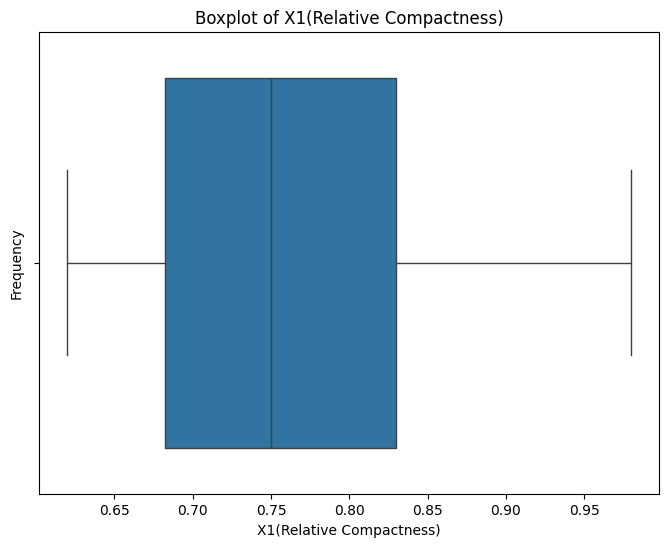

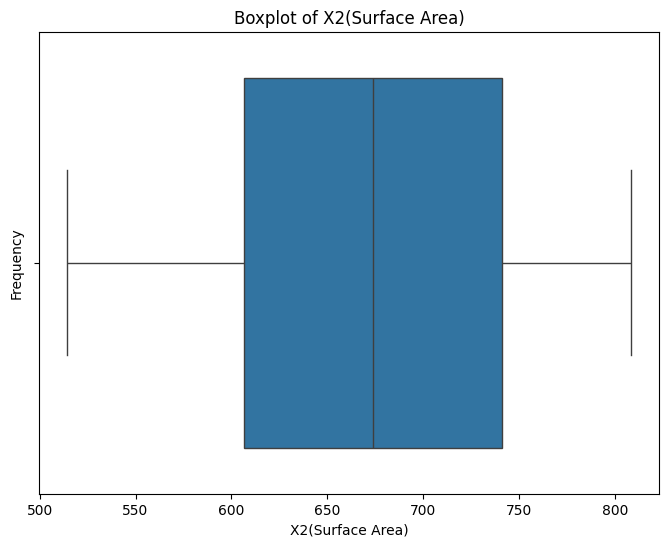

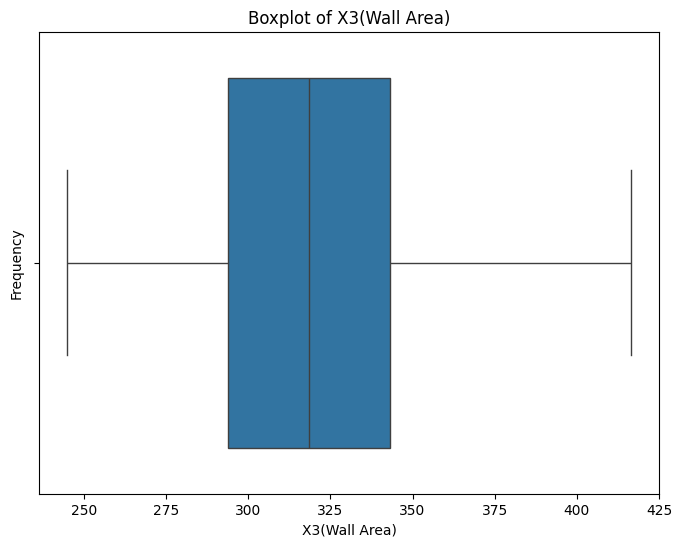

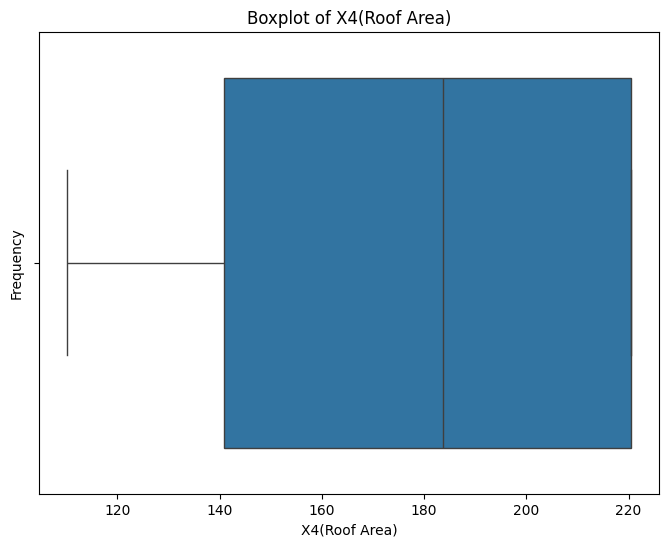

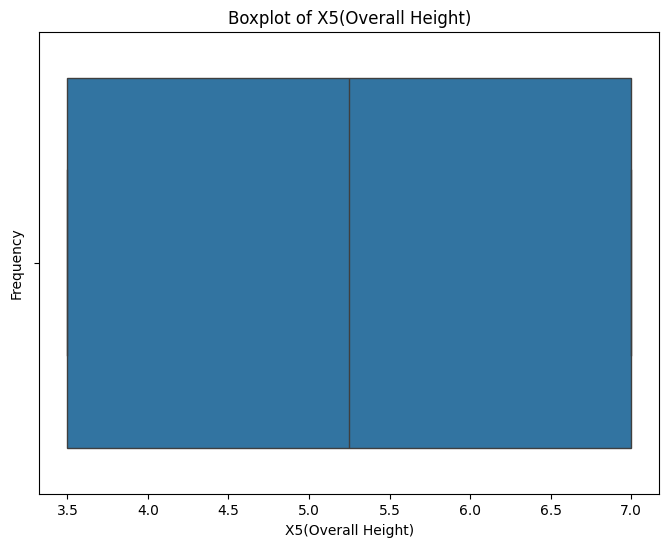

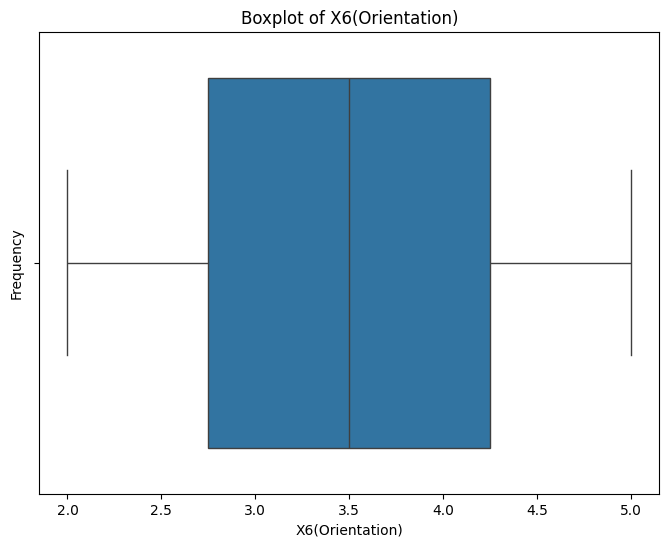

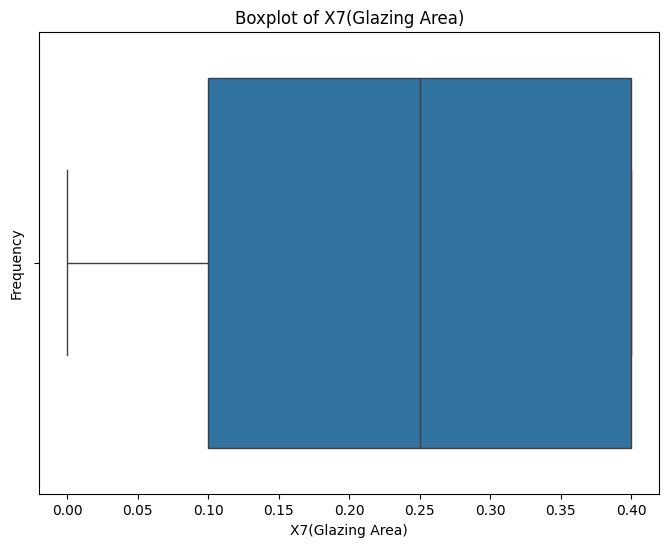

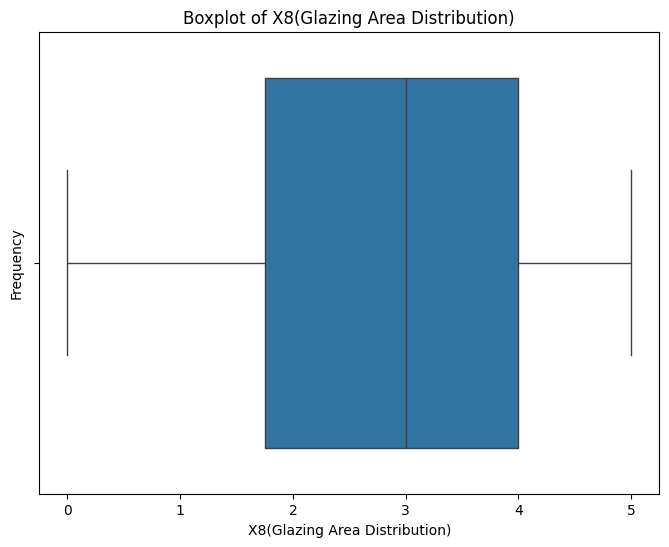

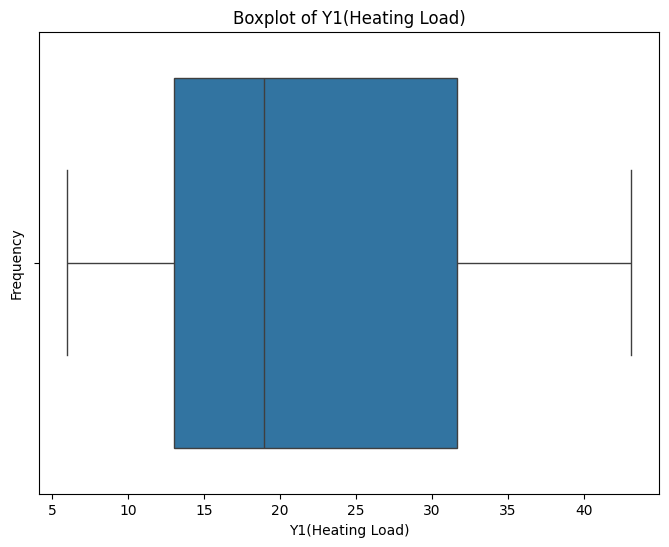

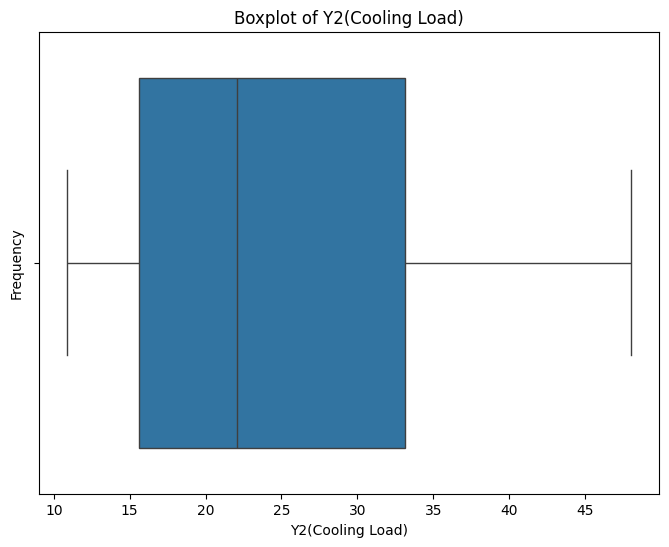

In [16]:
#boxplot for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From the boxplot
1. We can observe there are no outliers for the dataset but since histogram is showing skewness for few coloumns let check using IQR



In [18]:
# Calculate IQR and detect outliers
outliers = {}
for col in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col].count()

outliers


{'X1(Relative Compactness)': 0,
 'X2(Surface Area)': 0,
 'X3(Wall Area)': 0,
 'X4(Roof Area)': 0,
 'X5(Overall Height)': 0,
 'X6(Orientation)': 0,
 'X7(Glazing Area)': 0,
 'X8(Glazing Area Distribution)': 0,
 'Y1(Heating Load)': 0,
 'Y2(Cooling Load)': 0}

Since there are no outliers present we can proced further analysis

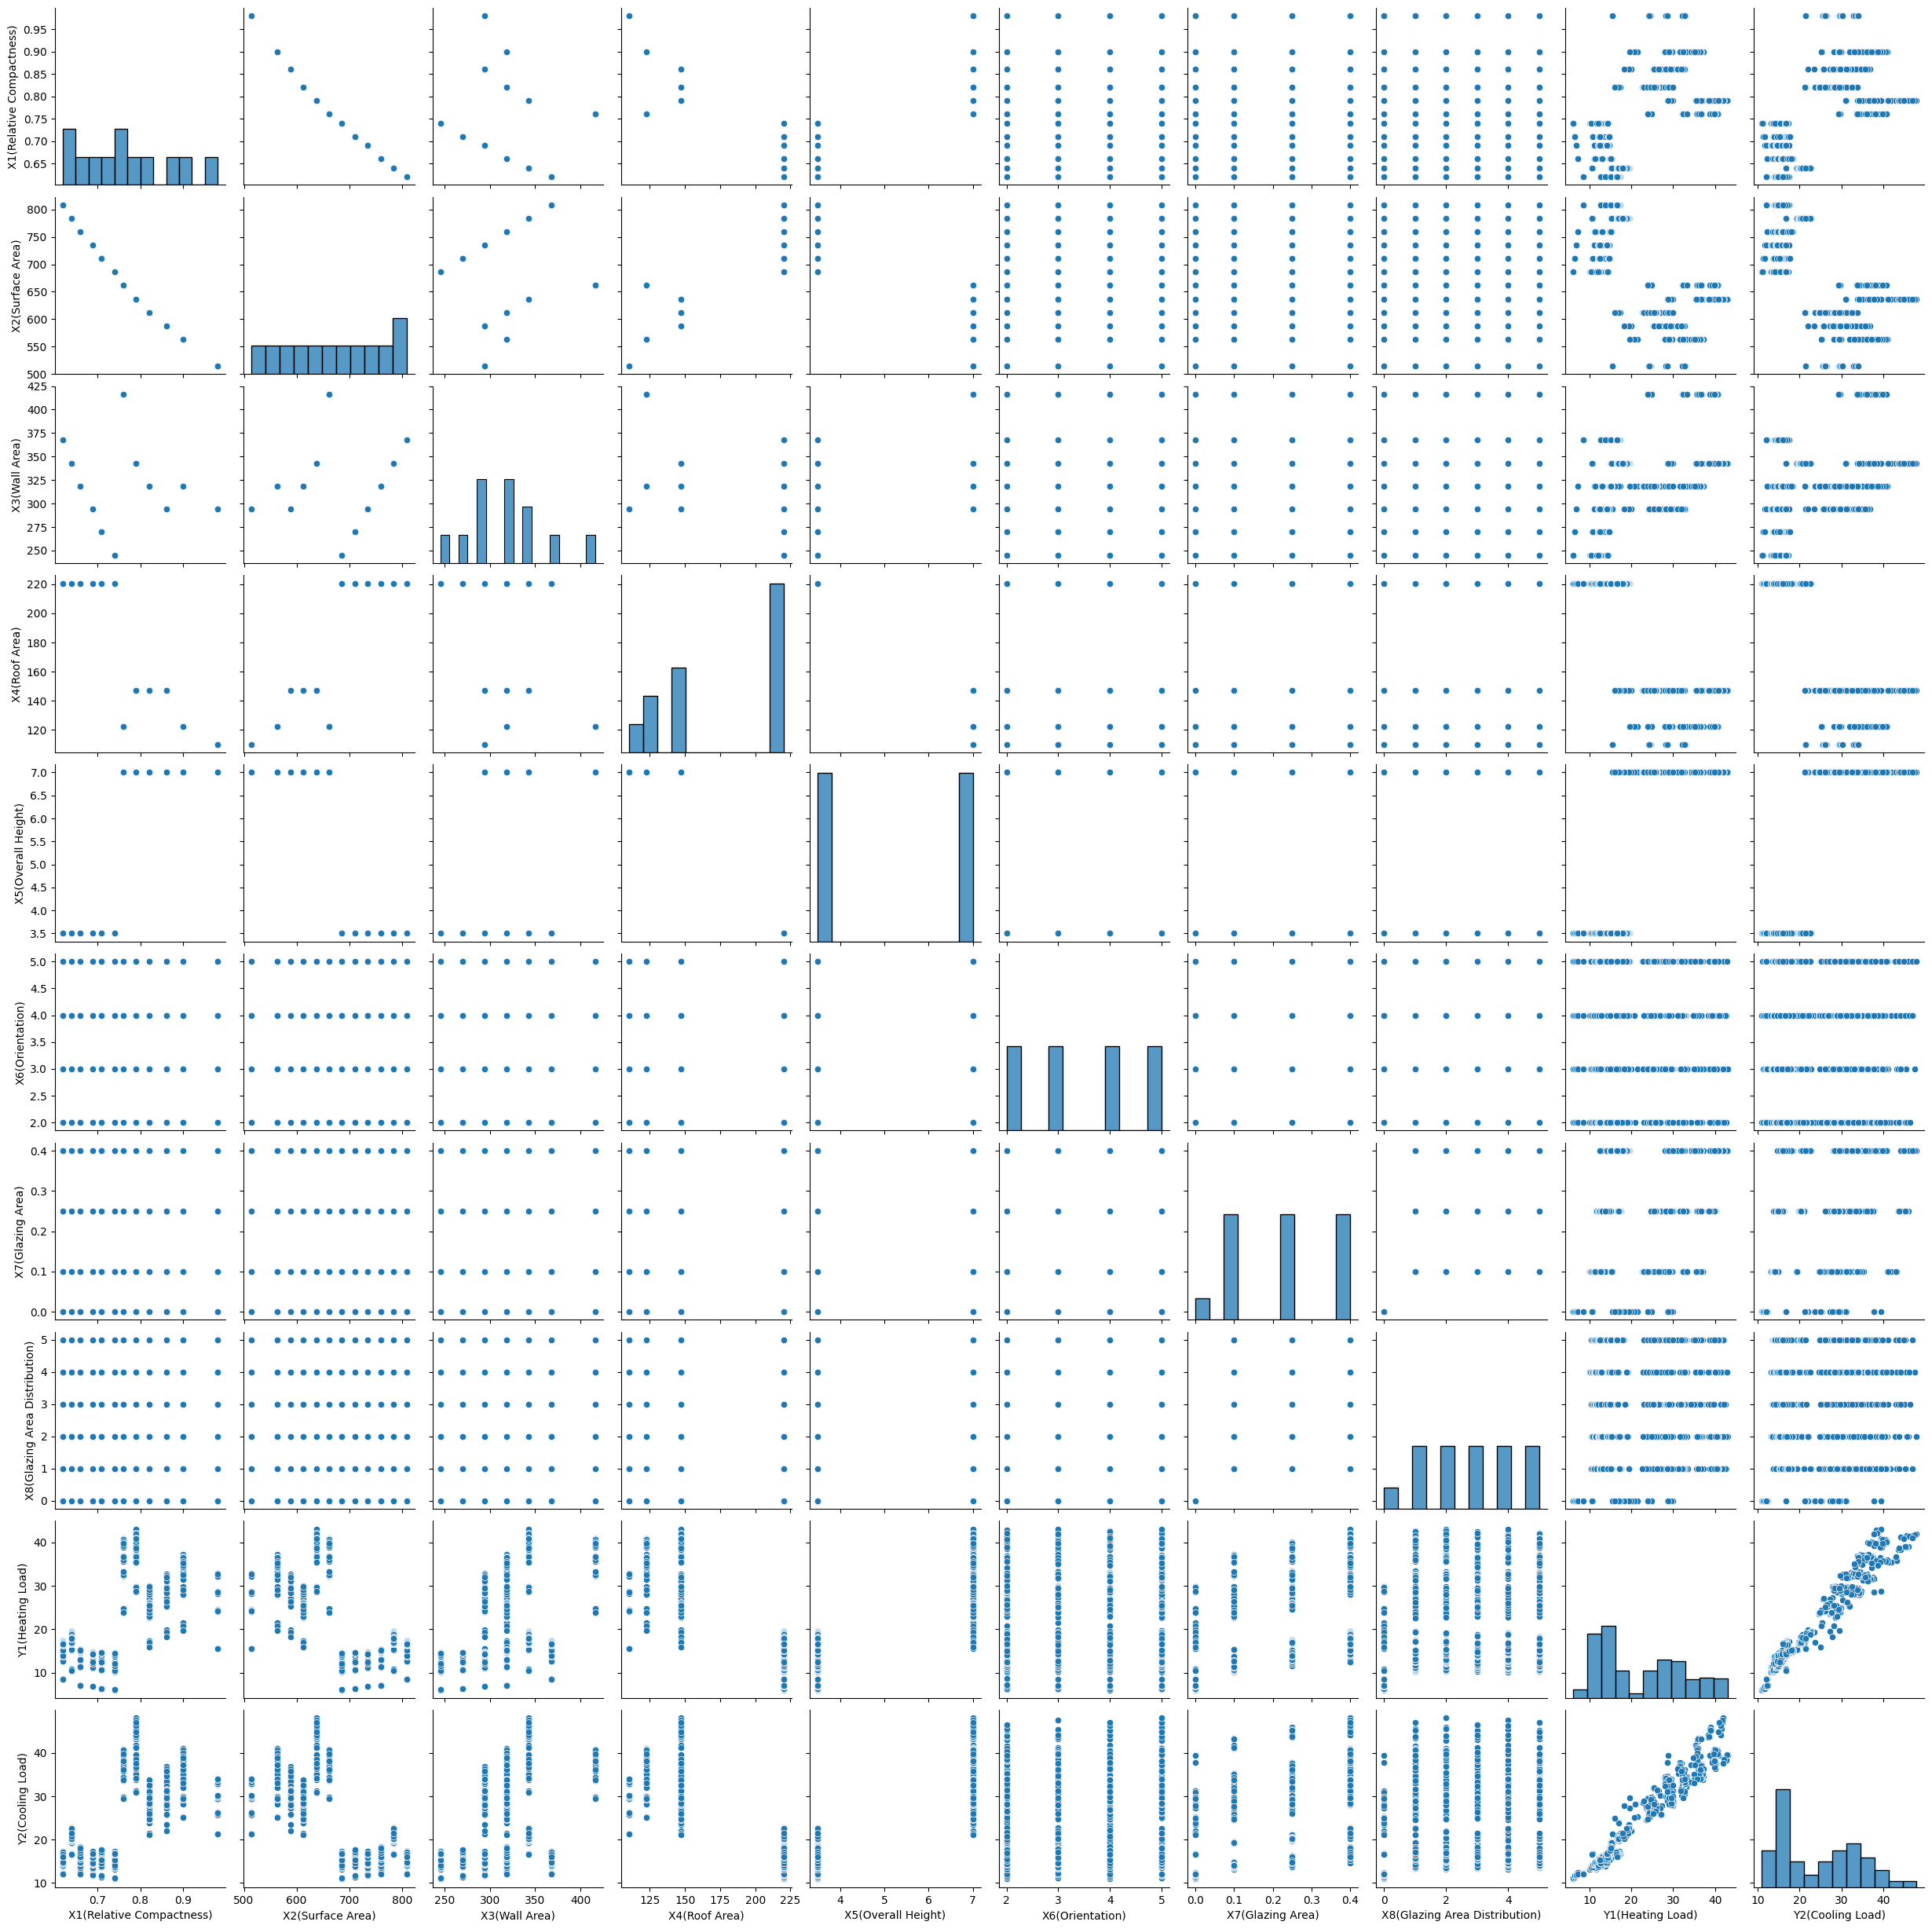

In [17]:
# Create the pairplot
sns.pairplot(data)
plt.show()

Observations from the Pairplot :
1. Relative Compactness(X1) vs Heating Load(Y1) & Cooling Load(Y2):
Negative correlation—as relative compactness increases, both heating and cooling load decrease.
Most data points cluster around 0.75 and 0.62, indicating these values are common.
2. Surface Area(X2) vs Heating Load & Cooling Load:
Positive correlation—higher surface area leads to higher heating and cooling load.
The trend suggests that buildings with larger surface areas require more energy.
3. Wall Area(X3) vs Heating Load & Cooling Load:
Weak correlation, scattered distribution.
Some buildings with similar wall areas have different energy loads, indicating other factors contribute more.
4. Roof Area(X4) vs Heating Load & Cooling Load:
No strong correlation.
Roof area values cluster around 110 and 150, showing minimal impact on energy loads.
5. Overall Height(X5) vs Heating Load & Cooling Load:
Strong positive correlation—taller buildings generally have higher heating and cooling loads.
Buildings with heights around 7m show a clear upward trend in energy usage.
6. Orientation(X6) vs Heating Load & Cooling Load:
No significant correlation—orientation does not strongly impact heating or cooling load.
Values are evenly spread across orientations.
7. Glazing Area(X7) vs Heating Load & Cooling Load:
Strong positive correlation—higher glazing areas lead to higher cooling loads.
Buildings with glazing areas around 0.4 show a sharp increase in cooling requirements.
8. Glazing Area Distribution (X8) vs Heating Load & Cooling Load:
No significant trend.
Different glazing area distributions show similar heating and cooling loads.
9. Heating Load (Y1) vs. Cooling Load (Y2):
Strong positive correlation: Buildings with high heating loads tend to have high cooling loads as well.
Indicates that poor insulation or large building size affects both heating and cooling demands.

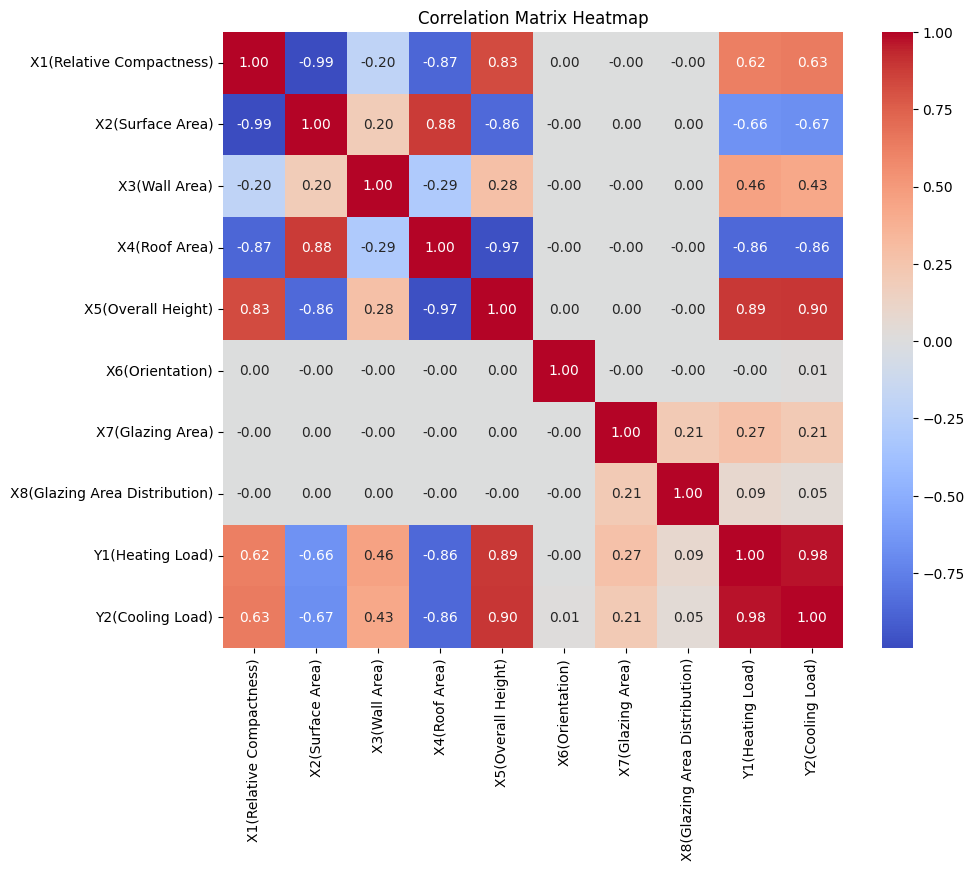

In [19]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

1. Y1 (Heating Load) and Y2 (Cooling Load) are highly correlated (0.98), indicating that factors affecting one also influence the other.
2. X5 (Overall Height) has a strong positive correlation with Y1 (0.89) and Y2 (0.90), meaning taller structures require more heating and cooling.
3. X1 (Relative Compactness) is moderately positively correlated with Y1 (0.62) and Y2 (0.63), indicating that more compact buildings tend to have higher heating and cooling loads.
4. X2 (Surface Area) has a strong negative correlation with Y1 (-0.66) and Y2 (-0.67), suggesting that buildings with larger surface areas have lower heating and cooling loads.
5. X4 (Roof Area) is highly negatively correlated with Y1 (-0.86) and Y2 (-0.86), meaning that as roof area increases, the heating and cooling loads decrease.
6. X3 (Wall Area) shows a weak to moderate positive correlation with Y1 (0.46) and Y2 (0.43), suggesting some influence but not as strong as other factors.
7. X7 (Glazing Area) and X8 (Glazing Area Distribution) have weak correlations with Y1 and Y2, meaning they do not significantly impact heating and cooling loads.
8. X6 (Orientation) has almost no correlation with Y1 and Y2, indicating that orientation does not play a significant role in heating and cooling loads.
9. Heating and Cooling Load (Y1 & Y2) are highly correlated with each other (0.98), meaning that buildings with high heating demands often also have high cooling demands.



In [20]:
# printing the data values in an array
data.values


array([[9.800e-01, 5.145e+02, 2.940e+02, ..., 0.000e+00, 1.555e+01,
        2.133e+01],
       [9.800e-01, 5.145e+02, 2.940e+02, ..., 0.000e+00, 1.555e+01,
        2.133e+01],
       [9.800e-01, 5.145e+02, 2.940e+02, ..., 0.000e+00, 1.555e+01,
        2.133e+01],
       ...,
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 5.000e+00, 1.644e+01,
        1.711e+01],
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 5.000e+00, 1.648e+01,
        1.661e+01],
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 5.000e+00, 1.664e+01,
        1.603e+01]])

In [21]:
#Scaling the data
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[1.   0.   0.29 0.   1.   0.   0.   0.   0.26 0.28]
 [1.   0.   0.29 0.   1.   0.33 0.   0.   0.26 0.28]
 [1.   0.   0.29 0.   1.   0.67 0.   0.   0.26 0.28]
 [1.   0.   0.29 0.   1.   1.   0.   0.   0.26 0.28]
 [0.78 0.17 0.43 0.11 1.   0.   0.   0.   0.4  0.47]]


In [22]:
# Standardize data (0 mean, 1 stdev)
array = data.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 2.04 -1.79 -0.56 -1.47  1.   -1.34 -1.76 -1.81 -0.67 -0.34]
 [ 2.04 -1.79 -0.56 -1.47  1.   -0.45 -1.76 -1.81 -0.67 -0.34]
 [ 2.04 -1.79 -0.56 -1.47  1.    0.45 -1.76 -1.81 -0.67 -0.34]
 [ 2.04 -1.79 -0.56 -1.47  1.    1.34 -1.76 -1.81 -0.67 -0.34]
 [ 1.28 -1.23  0.   -1.2   1.   -1.34 -1.76 -1.81 -0.15  0.39]]


So to conclude
Overall height has the height correlation for both the loads with relative compactness being the next high correlated feature.
Surface area and roof area has a high negative correlation with both the load . glazing area has a weak corr with both load ,Oreination has no correlation with loads.
1. So Heating and cooling loads increase with overall heights of buildings 🏢 .
2. Relative compactness contributes to higher energy ⚡ loads.
3. Larger surface and roof areas lead to lower heating and cooling loads.
4. Glazing area and orientation have minimal impact on loads.
5. 🔥❄️ Heating and cooling loads are highly correlated, meaning factors affecting one also impact the other.